In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import NMF,PCA
import matplotlib.pyplot as plt 

In [2]:
nRow,nCol = (2,5)
nComponents = nCol*nRow
imagShape = (64,64)

In [3]:
dataset = fetch_olivetti_faces(shuffle=True,random_state=6)
faces = dataset.data
faces

array([[0.40082645, 0.35950413, 0.56198347, ..., 0.08677686, 0.08264463,
        0.08677686],
       [0.6280992 , 0.70247936, 0.71487606, ..., 0.07438017, 0.08677686,
        0.09090909],
       [0.6280992 , 0.6446281 , 0.6735537 , ..., 0.10330579, 0.10743801,
        0.10743801],
       ...,
       [0.74380165, 0.75619835, 0.7644628 , ..., 0.3677686 , 0.35950413,
        0.37603307],
       [0.23553719, 0.35123968, 0.4338843 , ..., 0.06198347, 0.06198347,
        0.10330579],
       [0.2892562 , 0.338843  , 0.41735536, ..., 0.35950413, 0.35123968,
        0.36363637]], dtype=float32)

In [4]:
def plot_gallery(title,images,nCol=nCol,nRow=nRow):
    plt.figure(figsize=(2.0*nCol,2.26*nRow))
    plt.suptitle(title,size=16)

    for i, comp in enumerate(images):
        plt.subplot(nRow,nCol,i+1)
        vMax = max(comp.max(),-comp.min())

        plt.imshow(comp.reshape(imagShape),cmap=plt.cm.gray,interpolation='nearest',vmin=-vMax,vmax=vMax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01,0.05,0.99,0.93,0.04,0.0)

In [5]:
estimators = [('Eigenfaces - PCA using randomized SVD',PCA(n_components=10,whiten=False)),('Non-negative components=6 - NMF',
                NMF(n_components=10,init='nndsvda',tol=5e-3))]

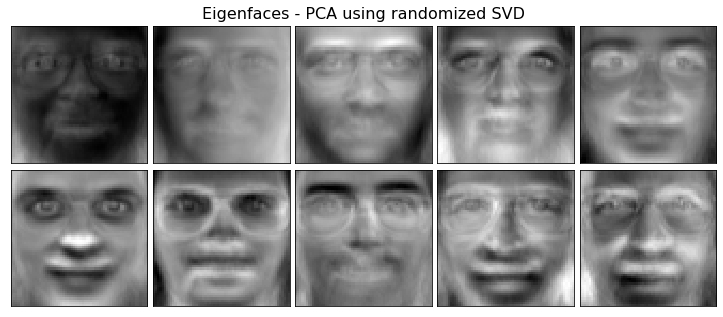

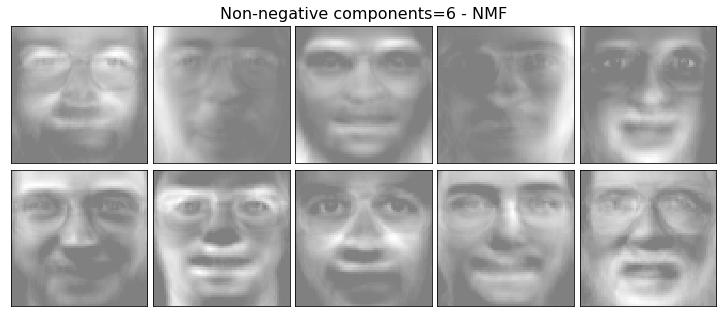

In [6]:
n_components = 10
for name,estimator in estimators:
    estimator.fit(faces)
    components_  = estimator.components_
    plot_gallery(name,components_[:n_components])